In [1]:
import pandas as pd
import seaborn as sns

In [2]:
game_data = pd.read_csv("../data/game_stats.csv")
games = pd.read_csv("../data/games.csv")

In [3]:
combined_data = games.merge(game_data, left_on='id', right_on='id', validate='one_to_one')

In [4]:
combined_data

,Unnamed: 0_x,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,0,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,...,3.4,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0
1,1,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,...,5.7,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0
2,2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,...,0.4,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0
3,3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,...,3.0,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0
4,4,332430194,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,103980.0,...,2.1,6-62,1,0,1,27:22,44.0,0.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,43,401282756,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,...,2.0,8-54,1,1,0,28:57,66.0,0.0,4.0,2.0
841,44,401282775,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,True,NaN,...,4.7,7-41,1,1,0,32:37,29.0,0.0,1.0,7.0
842,45,401282784,2021,4,regular,2021-09-25T23:00:00.000Z,0.0,False,True,NaN,...,3.9,7-50,2,1,1,37:14,62.0,1.0,1.0,8.0
843,46,401282811,2021,4,regular,2021-09-25T23:30:00.000Z,0.0,False,False,NaN,...,1.9,4-18,2,0,2,36:24,-1.0,0.0,2.0,1.0


In [5]:
def point_diff(row):
    return row["home_points"] - row["away_points"]

combined_data["point_differential"] = combined_data.apply(point_diff, axis=1)

In [11]:
combined_data.columns

Index(['Unnamed: 0_x', 'id', 'season', 'week', 'season_type', 'start_date',
       'start_time_tbd', 'neutral_site', 'conference_game', 'attendance',
       ...
       'away.totalPenaltiesYards', 'away.turnovers', 'away.fumblesLost',
       'away.interceptions', 'away.possessionTime', 'home.puntReturnYards',
       'home.puntReturnTDs', 'home.puntReturns', 'away.kickingPoints',
       'point_differential'],
      dtype='object', length=101)

Text(0.5, 1.0, 'Away Team Kicking Points vs Point Differential')

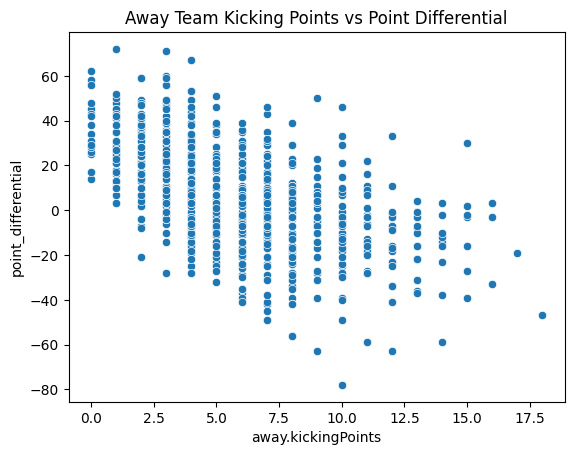

In [21]:
sns.scatterplot(
    data=combined_data, x="away.kickingPoints", y="point_differential"
).set_title("Away Team Kicking Points vs Point Differential")

Text(0.5, 1.0, 'Home Team Kicking Points vs Point Differential')

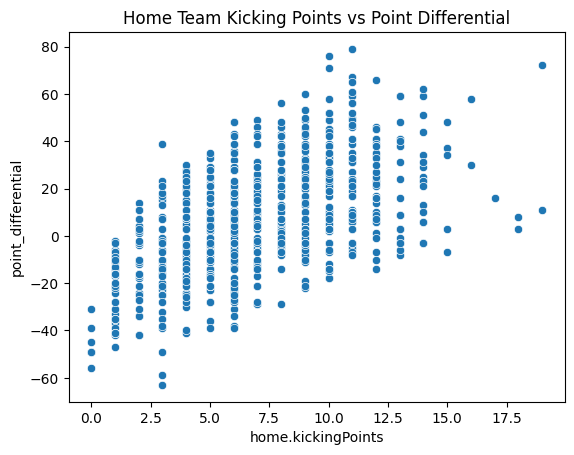

In [15]:
sns.scatterplot(
    data=combined_data, x="home.kickingPoints", y="point_differential"
).set_title("Home Team Kicking Points vs Point Differential")

Text(0.5, 1.0, 'Total Kicking Points Differential vs Point Differential')

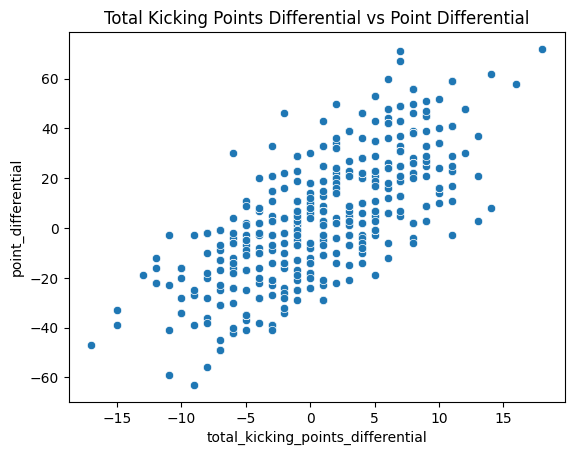

In [22]:
def total_kicking_point_diff(row):
    return row["home.kickingPoints"] - row["away.kickingPoints"]

combined_data["total_kicking_points_differential"] = combined_data.apply(total_kicking_point_diff, axis=1)
sns.scatterplot(
    data=combined_data, x="total_kicking_points_differential", y="point_differential"
).set_title("Total Kicking Points Differential vs Point Differential")

There is a positive relationship between kicking points and point differential. This visualization shows that the home team won